## **Submission Pertama: Menyelesaikan Permasalahan Human Resources**

* **Nama:** B. Hilda Nida Alistiqlal
* **Email:** [hildanida01@gmail.com](mailto:hildanida01@gmail.com)
* **Dicoding ID:** [hildanida](https://dicoding.com/users/hildanida)

### `Memuat Library`

In [73]:
# Memuat dataset
import numpy as np
import pandas as pd

# Visualisasi
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# Praproses dataset untuk machine learning
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Ketidakseimbangan dataset untuk keperluan machine learning
from imblearn.over_sampling import SMOTE, SMOTEN
from imblearn.combine import SMOTEENN

# Pembangunan model klasifikasi machine learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluasi model machine learning
from sklearn.metrics import make_scorer, fbeta_score, confusion_matrix, classification_report
import shap

# Menyimpan model
import pickle

# Menghilangkan warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", module="joblib.externals.loky")


In [74]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = '4'

### `Memuat Dataset`

In [75]:
# Memuat dataset
df = pd.read_csv('employee_data.csv')

# Menampilkan dataset 5 baris pertama dan 5 baris terakhir
print("Dataset Head dan Tail: ")
display(pd.concat([df.head(), df.tail()]))

# Mengetahui baris dan kolom
print("Shape Dataset:", df.shape)

Dataset Head dan Tail: 


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0
1469,1470,19,1.0,Travel_Frequently,602,Sales,1,1,Technical Degree,1,...,1,80,0,1,5,4,0,0,0,0


Shape Dataset: (1470, 35)


### `Informasi Dataset`

In [76]:
# Mengetahui info dari dataset
print("Data Information: ")
print(df.info())

Data Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   in

**Berikut penjelasan lebih rinci terkait masing-masing kolom:**

| Nama Kolom                  | Deskripsi                                                                 |
|-----------------------------|---------------------------------------------------------------------------|
| `EmployeeId`                | Identitas unik karyawan                                                   |
| `Attrition `                | Apakah karyawan keluar? (0 = tidak, 1 = ya)                               |
| `Age`                       | Usia karyawan                                                             |
| `BusinessTravel`            | Frekuensi perjalanan dinas untuk pekerjaan                                |
| `DailyRate`                 | Gaji harian                                                               |
| `Department`                | Departemen tempat karyawan bekerja                                        |
| `DistanceFromHome`          | Jarak rumah ke kantor (dalam km)                                          |
| `Education`                 | Tingkat pendidikan (1 = Di bawah PT, 2 = PT, 3 = S1, 4 = S2, 5 = S3)      |
| `EducationField`            | Bidang pendidikan                                                         |
| `EnvironmentSatisfaction`   | Kepuasan lingkungan kerja (1 = Rendah, ..., 4 = Sangat Tinggi)            |
| `Gender`                    | Jenis kelamin karyawan                                                    |
| `HourlyRate`                | Gaji per jam                                                              |
| `JobInvolvement`            | Keterlibatan kerja (1 = Rendah, ..., 4 = Sangat Tinggi)                   |
| `JobLevel`                  | Tingkat jabatan (1 sampai 5)                                              |
| `JobRole`                   | Peran/jabatan karyawan                                                    |
| `JobSatisfaction`           | Kepuasan kerja (1 = Rendah, ..., 4 = Sangat Tinggi)                       |
| `MaritalStatus`             | Status pernikahan                                                         |
| `MonthlyIncome`             | Gaji bulanan                                                              |
| `MonthlyRate`               | Tarif bulanan                                                             |
| `NumCompaniesWorked`        | Jumlah perusahaan yang pernah menjadi tempat bekerja                      |
| `Over18`                    | Apakah berusia lebih dari 18 tahun?                                       |
| `OverTime`                  | Apakah bekerja lembur?                                                    |
| `PercentSalaryHike`         | Persentase kenaikan gaji tahun lalu                                       |
| `PerformanceRating`         | Penilaian kinerja (1 = Rendah, ..., 4 = Luar Biasa)                       |
| `RelationshipSatisfaction`  | Kepuasan hubungan kerja (1 = Rendah, ..., 4 = Sangat Tinggi)              |
| `StandardHours`             | Jam kerja standar                                                         |
| `StockOptionLevel`          | Tingkat opsi saham                                                        |
| `TotalWorkingYears`         | Total tahun pengalaman kerja                                              |
| `TrainingTimesLastYear`     | Jumlah pelatihan yang diikuti tahun lalu                                  |
| `WorkLifeBalance`           | Keseimbangan hidup-kerja (1 = Rendah, ..., 4 = Luar Biasa)                |
| `YearsAtCompany`            | Lama bekerja di perusahaan saat ini (tahun)                               |
| `YearsInCurrentRole`        | Lama bekerja dalam peran saat ini (tahun)                                 |
| `YearsSinceLastPromotion`   | Lama sejak promosi terakhir (tahun)                                       |
| `YearsWithCurrManager`      | Lama bekerja dengan manajer saat ini (tahun)                              | 


In [77]:
def describe_dataset(df):
    # Menyiapkan list untuk informasi kolom
    list_item = []
    for col in df.columns:
        # Membuat informasi dasar untuk tiap kolom
        col_info = [
            col, 
            df[col].nunique(),
            df[col].unique(),
            df[col].dtype,
            df[col].isnull().sum(),
            round((df[col].isnull().sum() / len(df)) * 100, 2)
        ]
        
        # Menambahkan informasi kolom ke list
        list_item.append(col_info)

    # Membuat DataFrame dari list
    table_desc = pd.DataFrame(list_item, columns=[
        'column_name', 
        'number_of_unique', 
        'unique_sample', 
        'dtype', 
        'null_count', 
        'null_percentage'
    ])
    
    return table_desc

In [78]:
# Menampilkan deskripsi untuk dataset
print("Dataset Information: ")
display(describe_dataset(df))

Dataset Information: 


,column_name,number_of_unique,unique_sample,dtype,null_count,null_percentage
0,EmployeeId,1470,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,0,0.00
1,Age,43,"[38, 37, 51, 42, 40, 29, 55, 36, 32, 25, 20, 4...",int64,0,0.00
2,Attrition,2,"[nan, 1.0, 0.0]",float64,412,28.03
3,BusinessTravel,3,"[Travel_Frequently, Travel_Rarely, Non-Travel]",object,0,0.00
4,DailyRate,886,"[1444, 1141, 1323, 555, 1194, 352, 1124, 725, ...",int64,0,0.00
5,Department,3,"[Human Resources, Research & Development, Sales]",object,0,0.00
6,DistanceFromHome,29,"[1, 11, 4, 26, 2, 6, 18, 3, 14, 23, 12, 5, 10,...",int64,0,0.00
7,Education,5,"[4, 2, 3, 1, 5]",int64,0,0.00
8,EducationField,6,"[Other, Medical, Life Sciences, Marketing, Tec...",object,0,0.00
9,EmployeeCount,1,[1],int64,0,0.00


### `Pemrosesan Awal Dataset`

In [79]:
# Membuat salinan independen dari dataframe
df_copy = df.copy()

In [80]:
#  Menghapus kolom dengan satu nilai unik
df_copy = df_copy.drop(['StandardHours', 'Over18', 'EmployeeCount'], axis=1)

In [81]:
# Mengubah nilai numerik pada kolom 'Attrition' menjadi label kategorikal
attrition_map = {1: 'Yes', 0: 'No'}
df_copy['Attrition'] = df_copy['Attrition'].map(attrition_map)

# Mengubah nilai numerik pada kolom 'Education' menjadi label tingkat pendidikan
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'}
df_copy['Education'] = df_copy['Education'].map(education_map)

# Mengubah nilai numerik pada 'PerformanceRating' dan 'WorkLifeBalance' menjadi label kinerja
performance_map = {
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'}
df_copy['PerformanceRating'] = df_copy['PerformanceRating'].map(performance_map)
df_copy['WorkLifeBalance'] = df_copy['WorkLifeBalance'].map(performance_map)

# Mengubah skor kepuasan (1-4) menjadi label kategorikal
sactification_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'}
df_copy['EnvironmentSatisfaction'] = df_copy['EnvironmentSatisfaction'].map(sactification_map)
df_copy['JobSatisfaction'] = df_copy['JobSatisfaction'].map(sactification_map)
df_copy['RelationshipSatisfaction'] = df_copy['RelationshipSatisfaction'].map(sactification_map)
df_copy['JobInvolvement'] = df_copy['JobInvolvement'].map(sactification_map)

df_copy.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,Master,Other,Very High,...,Excellent,Medium,1,7,2,Excellent,6,2,1,2
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,Excellent,Low,0,15,2,Low,1,0,0,0
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,Excellent,High,3,18,2,Outstanding,10,0,2,7
3,4,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,Excellent,Very High,1,23,2,Outstanding,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,Master,Medical,High,...,Excellent,Medium,3,20,2,Excellent,5,3,0,2


In [82]:
# Mengecek jumlah baris duplikat pada dataframe
print(f'Banyak duplikat dataset: {df_copy.duplicated().sum()}')

Banyak duplikat dataset: 0


In [83]:
# Mengecek jumlah nilai kosong di setiap kolom pada dataframe
print(f'Jumlah nilai kosong di setiap kolom:\n{df_copy.isnull().sum()}')

Jumlah nilai kosong di setiap kolom:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
Yea

In [84]:
# Pengecekan distribusi data hilang
missing = df_copy.isna().sum()

# Heatmap
fig = go.Figure(data=go.Heatmap(
                z=[missing.values],
                x=missing.index,
                y=['Missing Values'],
                colorscale='reds'))

fig.update_layout(
    title='<b>Visualisasi heatmap untuk distribusi nilai kosong</b>',
    title_font=dict(size=22, family='Arial', color='black'),
    xaxis_title='Columns',
    yaxis_title='',
    height=600,
    width=1400,
    margin=dict(t=80, b=50),
    xaxis=dict(tickangle=90) 
)

fig.show()

In [85]:
df_copy['Attrition'].value_counts()

Attrition
No     879
Yes    179
Name: count, dtype: int64

### `Penentuan NaN Pada Kolom Attrition dengan Model`

In [86]:
# Memisahkan data berlabel dan tidak berlabel
labeled_data = df_copy[df_copy['Attrition'].notnull()]
unlabeled_data = df_copy[df_copy['Attrition'].isnull()]

# Memisahkan target dan fitur
y_train = labeled_data['Attrition']
X_train = labeled_data.drop('Attrition', axis=1)
X_test = unlabeled_data.drop('Attrition', axis=1)

# Menggabungkan X_train dan X_test untuk preprocessing konsisten
combined = pd.concat([X_train, X_test])

# One-hot encoding untuk fitur kategorikal
combined_encoded = pd.get_dummies(combined, drop_first=True)

# Memisahkan kembali ke X_train dan X_test
X_train_encoded = combined_encoded.iloc[:len(X_train), :]
X_test_encoded = combined_encoded.iloc[len(X_train):, :]

# Encode target Attrition (Yes/No) ke angka
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Melatih Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train_encoded, y_train_encoded)

# Memprediksi dan masukkan hasilnya ke dataframe asli
y_pred_encoded = rf_model.predict(X_test_encoded)
y_pred = le.inverse_transform(y_pred_encoded)
df_copy.loc[unlabeled_data.index, 'Attrition'] = y_pred

df_copy.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,No,Travel_Frequently,1444,Human Resources,1,Master,Other,Very High,...,Excellent,Medium,1,7,2,Excellent,6,2,1,2
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,Excellent,Low,0,15,2,Low,1,0,0,0
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,Excellent,High,3,18,2,Outstanding,10,0,2,7
3,4,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,Excellent,Very High,1,23,2,Outstanding,20,4,4,8
4,5,40,No,Travel_Rarely,1194,Research & Development,2,Master,Medical,High,...,Excellent,Medium,3,20,2,Excellent,5,3,0,2


In [87]:
# Mengecek jumlah nilai kosong di setiap kolom pada dataframe
print(f'Jumlah nilai kosong di setiap kolom setelah penentuan dengan model:\n{df_copy.isnull().sum()}')

Jumlah nilai kosong di setiap kolom setelah penentuan dengan model:
EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
Ye

### `Pemahaman Dataset`

In [88]:
# Statistik deskriptif untuk kolom numerik dan kategorikal pada dataset
print("Statistik Deskriptif Kolom Kategorikal:")
display(df_copy.describe(include=['object']).T)

print("Statistik Deskriptif Kolom Numerik:")
display(df_copy.drop(columns=['EmployeeId', 'Attrition']).describe(include=['number']).T.round(2))

Statistik Deskriptif Kolom Kategorikal:


,count,unique,top,freq
Attrition,1470,2,No,1278
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobRole,1470,9,Sales Executive,326
JobSatisfaction,1470,4,Very High,459


Statistik Deskriptif Kolom Numerik:


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92,9.14,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.49,403.51,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.19,8.11,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.89,20.33,30.0,48.0,66.0,83.75,100.0
JobLevel,1470.0,2.06,1.11,1.0,1.0,2.0,3.00,5.0
MonthlyIncome,1470.0,6502.93,4707.96,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.10,7117.79,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.69,2.50,0.0,1.0,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.21,3.66,11.0,12.0,14.0,18.00,25.0
StockOptionLevel,1470.0,0.79,0.85,0.0,0.0,1.0,1.00,3.0


In [89]:
# Menentukan kolom numerik yang akan divisualisasikan
numeric_columns = df_copy.drop(columns=['EmployeeId', 'Attrition']).select_dtypes(include='number').columns

# Menghitung jumlah baris dan kolom untuk grid
n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Buat subplots dengan subplot_titles untuk dataset
fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=[col for col in numeric_columns],
    shared_yaxes=False,
    horizontal_spacing=0.1,
    vertical_spacing=0.1
)

# Tambah boxplot untuk dataset
for idx, column in enumerate(numeric_columns):
    row = (idx // n_cols) + 1
    col = (idx % n_cols) + 1
    fig.add_trace(
        go.Box(
            x=df_copy[column],
            name='',
            boxmean=False,
            orientation='h'
        ),
        row=row,
        col=col
    )

    # Hilangkan label pada sumbu y
    fig.update_yaxes(showticklabels=False, row=row, col=col)

    if row < n_rows:
        fig.update_xaxes(showticklabels=False, row=row, col=col)

fig.update_layout(
    height=300 * n_rows,
    width=1400,
    showlegend=False,
    title_text='<b>Visualisasi boxplot untuk melihat outliers di setiap kolom numerik</b>',
    title_font=dict(size=22, family='Arial', color='black'),
    margin=dict(l=60, r=60, t=100, b=60),
    paper_bgcolor="white",
    plot_bgcolor="white"
)

for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(size=12)

fig.show()

In [90]:
# Menghitung nilai skewness di setiap kolom pada dataframe
skewness_values = df_copy[numeric_columns].skew()

# Definisi kategori skewness
def classify_skewness(skew_value):
    if skew_value > 0:
        return 'Right-Skewed'
    elif skew_value < 0:
        return 'Left-Skewed'
    else:
        return 'Symmetric (Normal)'

# Mebuat dataframe untuk kategori skewness
skewness_df = pd.DataFrame(skewness_values, columns=['Skewness'])
skewness_df['Kategori Skewness'] = skewness_df['Skewness'].apply(classify_skewness)

print("\nSkewness dan Kategorinya di setiap kolom:")
display(skewness_df)


Skewness dan Kategorinya di setiap kolom:


,Skewness,Kategori Skewness
Age,0.413286,Right-Skewed
DailyRate,-0.003519,Left-Skewed
DistanceFromHome,0.958118,Right-Skewed
HourlyRate,-0.032311,Left-Skewed
JobLevel,1.025401,Right-Skewed
MonthlyIncome,1.369817,Right-Skewed
MonthlyRate,0.018578,Right-Skewed
NumCompaniesWorked,1.026471,Right-Skewed
PercentSalaryHike,0.821128,Right-Skewed
StockOptionLevel,0.968980,Right-Skewed


In [91]:
# Menentukan layout grid
n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Membuat subplots
fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=[col for col in numeric_columns],
    horizontal_spacing=0.08,
    vertical_spacing=0.1
)

# Menambahkan histogram per kolom
for idx, col in enumerate(numeric_columns):
    row = (idx // n_cols) + 1
    col_pos = (idx % n_cols) + 1

    fig.add_trace(
        go.Histogram(
            x=df_copy[col],
            nbinsx=20,
            marker_color='skyblue',
            showlegend=False
        ),
        row=row,
        col=col_pos
    )

# Mdengatur layout figure
fig.update_layout(
    height=300 * n_rows,
    width=1400,
    title_text='<b>Distribusi data untuk kolom numerik</b>',
    title_font=dict(size=22, family='Arial', color='black'),
    margin=dict(t=80, b=50, l=50, r=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Menampilkan histogram dari semua kolom numerik untuk melihat distribusi data
for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(size=12)
fig.show()

- **Distribusi Age menunjukkan pola normal miring ke kanan**, dengan mayoritas karyawan berada di rentang usia 30–40 tahun. Ini menunjukkan demografi tenaga kerja yang relatif muda dan produktif.

- **MonthlyIncome dan TotalWorkingYears menunjukkan distribusi yang sangat skewed ke kanan (right-skewed)**. Artinya, sebagian besar karyawan memiliki pendapatan dan pengalaman kerja yang relatif rendah, dengan sedikit karyawan yang memiliki penghasilan atau pengalaman sangat tinggi.

- **JobLevel dan StockOptionLevel bersifat diskret dan sangat tidak seimbang**, di mana mayoritas karyawan berada di level 1 atau 0. Ini mencerminkan struktur organisasi yang berbasis piramida — banyak staf dengan sedikit manajer senior.

- Distribusi **NumCompaniesWorked, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, dan YearsWithCurrManager juga miring ke kanan**, menandakan banyak karyawan baru atau yang belum lama menjabat posisi atau manajer yang sama.

- **PercentSalaryHike dan TrainingTimesLastYear memiliki distribusi dominan di nilai-nilai rendah**, menunjukkan sebagian besar karyawan menerima kenaikan gaji dan pelatihan dalam jumlah terbatas setiap tahun.

- Variabel seperti **DailyRate, HourlyRate, dan MonthlyRate cenderung memiliki distribusi mendekati uniform**, yang bisa mengindikasikan bahwa nilainya tidak terlalu menentukan perbedaan antar karyawan atau mungkin di-generate secara acak.

In [92]:
# Menentukan kolom kategorikal yang akan divisualisasikan
categorical_columns = df_copy.drop(columns=['Attrition']).select_dtypes(include='object').columns
categorical_columns = categorical_columns[:15]

# Layout grid
n_cols = 5
n_rows = 3

# Palet warna
color_palette = px.colors.qualitative.Set3

# Subplots
fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=categorical_columns,
    horizontal_spacing=0.08,
    vertical_spacing=0.2
)

# Menambahkan barplot per kolom
for idx, col in enumerate(categorical_columns):
    row = (idx // n_cols) + 1
    col_pos = (idx % n_cols) + 1

    value_counts = df_copy[col].value_counts()
    categories = value_counts.index
    counts = value_counts.values

    fig.add_trace(
        go.Bar(
            x=categories,
            y=counts,
            marker_color=color_palette[:len(categories)],
            text=counts,
            textposition='inside',
            textfont=dict(color='black', size=11),
            name=col
        ),
        row=row,
        col=col_pos
    )

    # Rotasi label X axis
    fig.update_xaxes(tickangle=90, row=row, col=col_pos)

# Layout global
fig.update_layout(
    height=1200,
    width=1400,
    title_text='<b>Distribusi data untuk kolom kategorikal</b>',
    title_font=dict(size=22, family='Arial', color='black'),
    showlegend=False,
    margin=dict(t=100, b=50, l=60, r=60),
    plot_bgcolor='white',
    paper_bgcolor='white',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Menampilkan barplot dari semua kolom kategorik untuk melihat distribusi data
for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(size=12)
fig.show()

- Mayoritas **karyawan melakukan perjalanan bisnis jarang (Travel_Rarely) dan bekerja di departemen Research & Development**, menunjukkan bahwa sebagian besar tenaga kerja terpusat pada fungsi pengembangan dan tidak sering berpindah lokasi.

- **Tingkat pendidikan paling dominan adalah sarjana (Bachelor)**, sedangkan Doctor memiliki proporsi paling kecil, mengindikasikan bahwa perusahaan merekrut mayoritas lulusan S1, bukan tenaga kerja akademis tinggi.

- **Bidang pendidikan paling umum adalah Life Sciences dan Medical**, yang bisa menunjukkan bahwa industri perusahaan berkaitan dengan kesehatan, bioteknologi, atau sektor ilmiah.

- **Mayoritas karyawan memiliki High atau Very High** dalam Environment, Job, dan Relationship Satisfaction, yang secara umum mencerminkan tingkat kepuasan kerja yang cukup baik.

- Sebagian besar karyawan adalah Male dan berstatus Married, memberi gambaran demografis utama di dalam perusahaan.

- **Pada JobRole, terdapat persebaran yang cukup seimbang antara posisi teknis dan non-teknis**, meskipun posisi seperti Sales Executive dan Research Scientist mendominasi.

- Sebagian besar karyawan memiliki tingkat **JobInvolvement tinggi dan OverTime yang rendah**, yang bisa mencerminkan efisiensi kerja atau manajemen waktu yang baik.

- Tingkat **PerformanceRating sangat terpusat pada nilai tertinggi (Excellent)**, menimbulkan pertanyaan apakah ada inflasi penilaian kinerja atau kurangnya variasi objektif dalam evaluasi karyawan.

- **WorkLifeBalance didominasi oleh kategori Excellent dan Good**, namun masih ada porsi yang mengkhawatirkan untuk kategori Low, yang bisa menjadi fokus perbaikan keseimbangan kerja-hidup di masa depan.

In [93]:
# Menghitung korelasi
correlation_matrix = df_copy.drop(columns=['EmployeeId']).corr(numeric_only=True).round(2)

# Mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_masked = correlation_matrix.mask(mask)

# Membuat teks anotasi
annot_text = []
for i in range(correlation_masked.shape[0]):
    row = []
    for j in range(correlation_masked.shape[1]):
        val = correlation_masked.iloc[i, j]
        if np.isnan(val):
            row.append("")
        elif abs(val) >= 0.5:
            row.append(f"<b>{val:.2f}</b>")  # tebal untuk korelasi kuat
        else:
            row.append(f"<span style='color:gray'>{val:.2f}</span>")  # korelasi lemah dibuat abu-abu
    annot_text.append(row)

# Plot heatmap
fig = ff.create_annotated_heatmap(
    z=correlation_masked.values,
    x=correlation_masked.columns.tolist(),
    y=correlation_masked.index.tolist(),
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    annotation_text=annot_text,
    showscale=True,
    reversescale=True,
    hoverinfo='z'
)

# Layout
fig.update_layout(
    title_text='<b>Visualisasi heatmap korelasi antar kolom</b>',
    title_font=dict(size=22, family='Arial', color='black'),
    height=800,
    width=1400,
    xaxis=dict(tickangle=90),
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Menampilkan heatmap
fig.show()


- Terdapat **korelasi yang sangat tinggi antara MonthlyIncome dan JobLevel**, menunjukkan bahwa semakin tinggi level jabatan seseorang, semakin besar pula penghasilannya.

- **TotalWorkingYears menunjukkan hubungan yang moderat dengan YearsAtCompany, YearsInCurrentRole, dan YearsWithCurrManager**, yang menggambarkan bahwa semakin besar total pengalaman kerja seseorang, maka biasanya ia juga lebih lama bekerja di perusahaan dan dalam satu peran atau bersama manajer yang sama. Selain itu, **TotalWorkingYears berhubungan kuat dengan Age, JobLevel, dan MonthlyIncome**, yang menunjukkan bahwa semain banyak pengalaman seseorang, maka semakin besar juga pendapat per bulannya.

- **Korelasi antara NumCompaniesWorked dan TotalWorkingYears bersifat positif meskipun tidak terlalu kuat**, yang mengindikasikan bahwa semakin lama pengalaman kerja, semakin banyak perusahaan yang pernah dimasuki.

- **Beberapa variabel seperti DistanceFromHome, HourlyRate, dan DailyRate memiliki korelasi sangat rendah terhadap variabel lain**, sehingga kemungkinan besar tidak memberikan kontribusi signifikan dalam analisis prediktif dan dapat dipertimbangkan untuk dihapus.

- **Korelasi cukup kuat antara YearsSinceLastPromotion dan YearsAtCompany serta YearsInCurrentRole** menunjukkan bahwa lama bekerja dalam satu peran atau di perusahaan cenderung berhubungan dengan lamanya waktu menunggu promosi.

- Tidak ditemukan korelasi negatif yang signifikan antar fitur, sehingga tidak ada dua fitur numerik yang saling bertentangan secara linear. Hal ini menunjukkan bahwa tidak ada inkonsistensi besar dalam data numerik yang tersedia.

In [94]:
# Encode kolom Attrition ke numerik
df_corr = df_copy.copy()
df_corr['AttritionNum'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})

# Hitung korelasi Spearman dengan target
df_heatmap_corr = df_corr.corr(method='spearman', numeric_only=True)[['AttritionNum']].drop('AttritionNum')
df_heatmap_corr_sorted = df_heatmap_corr.sort_values(by='AttritionNum', ascending=False).round(3)

# Buat heatmap Plotly
fig = px.imshow(
    df_heatmap_corr_sorted,
    text_auto=True,
    color_continuous_scale='RdBu_r',  # merah → positif, biru → negatif
    zmin=-1, zmax=1,
    aspect='auto',
    labels=dict(color='Korelasi'),
    title='<b>Korelasi Fitur terhadap Target (Attrition)</b>'
)

# Update layout seperti seaborn
fig.update_layout(
    height=800,
    width=1400,
    margin=dict(t=100, b=50, l=80, r=80),
    title_font=dict(size=22, family='Arial', color='black'),
    xaxis=dict(title='', showticklabels=True),
    yaxis=dict(title=''),
    coloraxis_colorbar=dict(title='Spearman Corr')
)

fig.show()


- Fitur yang memiliki **korelasi negatif paling kuat dengan attrition adalah TotalWorkingYears**, yang menunjukkan bahwa karyawan dengan pengalaman kerja yang lebih lama cenderung lebih stabil dan kecil kemungkinannya untuk keluar dari perusahaan.

- **MonthlyIncome dan YearsAtCompany juga menunjukkan korelasi negatif yang cukup jelas**, mengindikasikan bahwa semakin lama seseorang bekerja dan semakin besar penghasilannya, maka kemungkinan untuk keluar dari pekerjaan semakin kecil.

- **Korelasi negatif pada JobLevel, Age, dan StockOptionLevel** menguatkan dugaan bahwa karyawan yang lebih senior dalam u**sia maupun jabatan memiliki retensi yang lebih tinggi** dibanding mereka yang baru atau masih berada di level rendah.

- **Fitur YearsInCurrentRole dan YearsWithCurrManager juga berkorelasi negatif dengan attrition**, yang artinya loyalitas terhadap **posisi dan manajer tertentu dapat menjadi faktor penting dalam mempertahankan karyawan.**

- Sementara itu, beberapa fitur seperti **DistanceFromHome, MonthlyRate, dan NumCompaniesWorked menunjukkan korelasi positif** yang sangat lemah atau hampir nol terhadap attrition, menandakan bahwa faktor-faktor ini tidak terlalu berpengaruh secara langsung terhadap keputusan seseorang untuk keluar.

- Korelasi fitur seperti T**rainingTimesLastYear, DailyRate, dan HourlyRate juga sangat lemah**, yang mungkin menandakan bahwa **frekuensi pelatihan atau kompensasi berbasis waktu tidak menjadi faktor utama dalam turnover karyawan.**

In [95]:
# Menyimpan dataset hasil pembersihan dengan format csv
df_copy.to_csv('employee_data_cleaned.csv', index=False)

### `Visualisasi Bivariate`

In [96]:
# Kolom kategorikal yang ingin divisualisasikan terhadap JobRole
cat_columns = df_copy.drop(columns=['Department', 'JobRole']).select_dtypes(include='object').columns

# Menyimpan figure dalam list untuk ditampilkan satu per satu
figures = []

# Membuat figure terpisah per kolom
for col in cat_columns:
    data = df_copy.groupby([col, 'JobRole']).size().reset_index(name='Count')
    fig = px.bar(
        data,
        x='JobRole',
        y='Count',
        color=col,
        barmode='group',
        title=f"Distribusi JobRole berdasarkan {col}"
    )
    fig.update_layout(
        height=600,
        width=1400,
        title=dict(
            text=f"<b>Distribusi JobRole berdasarkan {col}</b>",
            font=dict(size=22, family='Arial', color='black')
        ),
        plot_bgcolor='white',
        paper_bgcolor='white',
        legend_title_text=col,
        uniformtext_minsize=8,
        uniformtext_mode='hide'
    )
    figures.append(fig)

# Menampilkan satu per satu
for fig in figures:
    fig.show()

In [97]:
# Kolom kategorikal yang ingin divisualisasikan terhadap Department
cat_columns = df_copy.drop(columns=['Department', 'JobRole']).select_dtypes(include='object').columns

# Menyimpan figure dalam list untuk ditampilkan satu per satu
figures = []

# Membuat figure terpisah per kolom
for col in cat_columns:
    data = df_copy.groupby([col, 'Department']).size().reset_index(name='Count')
    fig = px.bar(
        data,
        x='Department',
        y='Count',
        color=col,
        barmode='group',
        title=f"Distribusi Department berdasarkan {col}"
    )
    fig.update_layout(
        height=600,
        width=1400,
        title=dict(
            text=f"<b>Distribusi Department berdasarkan {col}</b>",
            font=dict(size=22, family='Arial', color='black')
        ),
        plot_bgcolor='white',
        paper_bgcolor='white',
        legend_title_text=col,
        uniformtext_minsize=8,
        uniformtext_mode='hide'
    )
    figures.append(fig)

# Menampilkan satu per satu
for fig in figures:
    fig.show()

In [98]:
# Kolom kategorikal yang ingin divisualisasikan terhadap Attrition
cat_columns = df_copy.drop(columns=['Attrition']).select_dtypes(include='object').columns

# Menyimpan figure dalam list untuk ditampilkan satu per satu
figures = []

# Membuat figure terpisah per kolom
for col in cat_columns:
    data = df_copy.groupby([col, 'Attrition']).size().reset_index(name='Count')
    fig = px.bar(
        data,
        x='Attrition',
        y='Count',
        color=col,
        barmode='group',
        title=f"Distribusi Attrition berdasarkan {col}"
    )
    fig.update_layout(
        height=600,
        width=1400,
        title=dict(
            text=f"<b>Distribusi Attrition berdasarkan {col}</b>",
            font=dict(size=22, family='Arial', color='black')
        ),
        plot_bgcolor='white',
        paper_bgcolor='white',
        legend_title_text=col,
        uniformtext_minsize=8,
        uniformtext_mode='hide'
    )
    figures.append(fig)

# Menampilkan satu per satu
for fig in figures:
    fig.show()

### `Visualisasi Multivariate`

In [99]:
# Menampilkan hubungan antara Attrition dengan PercentSalaryHike dan JobRole
fig = px.box(
    df_copy,
    x='JobRole',
    y='PercentSalaryHike',
    color='Attrition',
    title='<b>Attrition vs Percent Salary Hike dengan Job Roles</b>',
    labels={'PercentSalayrHike': 'Monthly Income', 'JobRole': 'Job Role'},
    category_orders={
        'Attrition': ['No', 'Yes']}
)

fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    xaxis_tickangle=90,
    plot_bgcolor='white',
    paper_bgcolor='white'
)
fig.show()

In [100]:
# Menampilkan hubungan antara Attrition dengan PercentSalaryHike dan Department
fig = px.box(
    df_copy,
    x='Department',
    y='PercentSalaryHike',
    color='Attrition',
    title='<b>Attrition vs Percent Salary Hike dengan Departments</b>',
    labels={'PercentSalayrHike': 'Monthly Income', 'JobRole': 'Job Role'},
    category_orders={
        'Attrition': ['No', 'Yes']}
)

fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    xaxis_tickangle=90,
    plot_bgcolor='white',
    paper_bgcolor='white'
)
fig.show()

In [101]:
# Menampilkan hubungan antara Attrition dengan MonthlyIncome dan JobLevel
fig = px.box(
    df_copy,
    x='Attrition',
    y='MonthlyIncome',
    color='Attrition',
    facet_col='JobLevel',
    title='<b>Attrition vs Monthly Income dengan Job Levels</b>',
    labels={'MonthlyIncome': 'Monthly Income'},
    category_orders={
        'Attrition': ['No', 'Yes'],
        'JobLevel': sorted(df_copy['JobLevel'].unique())  # pastikan urut
    }
)
fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white'
)
fig.show()

In [102]:
# Menampilkan hubungan antara Attrition dengan Totalworkingyears dan Age
df_copy['TotalWorkingYears_binned'] = pd.cut(
    df_copy['TotalWorkingYears'],
    bins=[0, 5, 10, 20, 40],
    labels=['0–5', '6–10', '11–20', '21–40']
)

fig = px.box(
    df_copy,
    x='Attrition',
    y='Age',
    color='Attrition',
    facet_col='TotalWorkingYears_binned',
    title='<b>Attrition vs Age dengan Total Working Years</b>',
    labels={'Age': 'Age'},
    category_orders={'Attrition': ['No', 'Yes']}
)
fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white'
)
fig.show()

In [103]:
# Menampilkan hubungan antara Attrition dengan PercentSalaryHike dan YearsAtCompany
df_copy['YearsAtCompany_binned'] = pd.cut(
    df_copy['YearsAtCompany'],
    bins=[0, 2, 5, 10, 40],
    labels=['0–2', '3–5', '6–10', '11–40']
)

fig = px.box(
    df_copy,
    x='Attrition',
    y='PercentSalaryHike',
    color='Attrition',
    facet_col='YearsAtCompany_binned',
    title='<b>Attrition vs Percent Salary Hike dengan Years at Company</b>',
    labels={'PercentSalaryHike': 'Percent Salary Hike'},
    category_orders={'Attrition': ['No', 'Yes']}
)
fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white'
)
fig.show()

### `Visualisasi yang Berfokuskan pada Attrition=Yes atau 1`

In [104]:
# Membuat dataframe baru untuk melihat semua baris yang Attrition=Yes
df_attr = df_copy[df_copy['Attrition'] == 'Yes']
df_attr['Attrition'].unique()

array(['Yes'], dtype=object)

In [105]:
# Membuat urutan status pernikanan
marit_order = ['Divorced', 'Single', 'Married']

# Melihat bagaimana setiap karakteristik karyawan yang keluar perusahaan berdasarkan pada Gender dan MaritalStatus
fig = px.histogram(
    df_attr,
    x='Gender',
    color='MaritalStatus',
    barmode='group',
    title='<b>Visualisasi Attrition=Yes berdasarkan Gender dan MaritalStatus</b>',
    text_auto=True,
    category_orders={'MaritalStatus': marit_order} 
)

fig.update_traces(
    textfont_size=12,
    textangle=0,
    textposition='outside',
    textfont_color='black',
    textfont_family='Arial Black' 
)

fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white'
)
fig.show()

In [106]:
# Membuat urutan pendidikan
edu_order = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']

# Melihat bagaimana setiap karakteristik karyawan yang keluar perusahaan berdasarkan pada Department dan Education
fig = px.histogram(
    df_attr,
    x='Department',
    color='Education',
    barmode='group',
    title='<b>Visualisasi Attrition=Yes berdasarkan Department dan Education</b>',
    text_auto=True,
    category_orders={'Education': edu_order}    
)

fig.update_traces(
    textfont_size=12,
    textangle=0,
    textposition='outside',
    textfont_color='black',
    textfont_family='Arial Black' 
)

fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Education'
)
fig.show()

In [107]:
# Membuat urutan status kepuasan pekerjaan
jobsatisfaction_order = ['Low', 'Medium', 'High', 'Very High']

# Melihat bagaimana setiap karakteristik karyawan yang keluar perusahaan berdasarkan pada JobRole dan JobSatisfaction
fig = px.histogram(
    df_attr,
    x='JobRole',
    color='JobSatisfaction',
    barmode='group',
    title='<b>Visualisasi Attrition=Yes berdasarkan JobRole dan JobSatisfaction</b>',
    text_auto=True,
    category_orders={'JobSatisfaction': jobsatisfaction_order} 
)

fig.update_traces(
    textfont_size=12,
    textangle=0,
    textposition='outside',
    textfont_color='black',
    textfont_family='Arial Black' 
)

fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Job Satisfaction'
)
fig.show()


In [108]:
# Melihat bagaimana setiap performa karyawan yang keluar perusahaan berdasarkan pada EnvironmentSatisfaction dan RelationshipSatisfaction
fig = px.histogram(
    df_attr,
    x='EnvironmentSatisfaction',
    color='RelationshipSatisfaction',
    barmode='group',
    title='<b>Visualisasi Attrition=Yes berdasarkan EnvironmentSatisfaction dan RelationshipSatisfaction</b>',
    text_auto=True,
    category_orders={
        'EnvironmentSatisfaction': ['Low', 'Medium', 'High', 'Very High'],
        'RelationshipSatisfaction': ['Low', 'Medium', 'High', 'Very High']}
)

fig.update_traces(
    textfont_size=12,
    textangle=0,
    textposition='outside',
    textfont_color='black',
    textfont_family='Arial Black' 
)

fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Relationship Satisfaction'
)
fig.show()

In [109]:
# Melihat bagaimana setiap performa karyawan yang keluar perusahaan berdasarkan pada OverTime dan WorkLifeBalance
fig = px.histogram(
    df_attr,
    x='OverTime',
    color='WorkLifeBalance',
    barmode='group',
    title='<b>Visualisasi Attrition=Yes berdasarkan OverTime dan WorkLifeBalance</b>',
    text_auto=True,
    category_orders={
        'WorkLifeBalance': ['Low', 'Good', 'Excellent', 'Outstanding']}
)

fig.update_traces(
    textfont_size=12,
    textangle=0,
    textposition='outside',
    textfont_color='black',
    textfont_family='Arial Black' 
)

fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Work Life Balance'
)
fig.show()

In [110]:
# Melihat bagaimana setiap performa karyawan yang keluar perusahaan berdasarkan pada MonthlyIncome dan PercentSalaryHike
fig = px.scatter(
    df_attr,
    x='MonthlyIncome',
    y='PercentSalaryHike',
    color='JobRole',
    title='<b>Visualisasi Attrition=Yes berdasarkan MonthlyIncome dan PercentSalaryHike</b>',
    hover_data=['JobRole']
)
fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Job Role'
)
fig.show()

### `Pemodelan Machine Learning`

In [ ]:
# Membuat salinan untuk dataframe pemodelan
df_model = df_copy.copy()

In [ ]:
# Mengubah nilai numerik pada kolom 'Attrition' menjadi label kategorikal
attrition_map = {'Yes': 1, 'No': 0}
df_model['Attrition'] = df_model['Attrition'].map(attrition_map)

# Membuang beberapa kolom yang tidak dibutuhkan dalam proses pemodelan
df_model.drop(columns=['EmployeeId', 'TotalWorkingYears_binned', 'YearsAtCompany_binned'], inplace=True)
display(df_model.head(), df_model.tail())
print(f"Jumlah baris dan kolom pada dataset keperluan machine learning: {df_model.shape}")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,0,Travel_Frequently,1444,Human Resources,1,Master,Other,Very High,Male,...,Excellent,Medium,1,7,2,Excellent,6,2,1,2
1,37,1,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,Female,...,Excellent,Low,0,15,2,Low,1,0,0,0
2,51,1,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,Male,...,Excellent,High,3,18,2,Outstanding,10,0,2,7
3,42,0,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,Female,...,Excellent,Very High,1,23,2,Outstanding,20,4,4,8
4,40,0,Travel_Rarely,1194,Research & Development,2,Master,Medical,High,Female,...,Excellent,Medium,3,20,2,Excellent,5,3,0,2


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,38,0,Travel_Rarely,168,Research & Development,1,Bachelor,Life Sciences,High,Female,...,Excellent,Very High,0,10,4,Outstanding,1,0,0,0
1466,50,0,Travel_Rarely,813,Research & Development,17,Doctor,Life Sciences,Very High,Female,...,Excellent,High,3,19,3,Excellent,14,11,1,11
1467,28,1,Travel_Rarely,1485,Research & Development,12,Below College,Life Sciences,High,Female,...,Excellent,Very High,0,1,4,Good,1,1,0,0
1468,40,0,Non-Travel,458,Research & Development,16,College,Life Sciences,High,Male,...,Excellent,Medium,1,6,0,Excellent,4,2,0,0
1469,19,1,Travel_Frequently,602,Sales,1,Below College,Technical Degree,High,Female,...,Outstanding,Low,0,1,5,Outstanding,0,0,0,0


Jumlah baris dan kolom pada dataset keperluan machine learning: (1470, 31)


In [ ]:
# Mengubah tipe data dan membuat urutan untuk beberapa fitur yang digunakan untuk keperluan ordinal encoding saat machine learning
education_order = {
    'Below College': 1, 'College': 2,
    'Bachelor': 3, 'Master': 4,'Doctor': 5
}
df_model['Education'] = df_model['Education'].map(education_order)
df_model['Education'] = df_model['Education'].astype(int)

satisfaction_order = {
    'Low': 1, 'Medium': 2,
    'High': 3, 'Very High': 4
}
df_model['EnvironmentSatisfaction'] = df_model['EnvironmentSatisfaction'].map(satisfaction_order)
df_model['EnvironmentSatisfaction'] = df_model['EnvironmentSatisfaction'].astype(int)
df_model['JobSatisfaction'] = df_model['JobSatisfaction'].map(satisfaction_order)
df_model['JobSatisfaction'] = df_model['JobSatisfaction'].astype(int)
df_model['JobInvolvement'] = df_model['JobInvolvement'].map(satisfaction_order)
df_model['JobInvolvement'] = df_model['JobInvolvement'].astype(int)
df_model['RelationshipSatisfaction'] = df_model['RelationshipSatisfaction'].map(satisfaction_order)
df_model['RelationshipSatisfaction'] = df_model['RelationshipSatisfaction'].astype(int)

workbalance_order = {
    'Low': 1, 'Good': 2,
    'Excellent': 3, 'Outstanding': 4
}
df_model['WorkLifeBalance'] = df_model['WorkLifeBalance'].map(workbalance_order)
df_model['WorkLifeBalance'] = df_model['WorkLifeBalance'].astype(int)

In [ ]:
# Mendefinisikan fitur yang dikategorikan dalam tipe kategorikal
cat_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                'JobRole', 'MaritalStatus', 'OverTime', 'PerformanceRating']

# Mendefinisikan fitur yang dikategorikan dalam tipe numerik
num_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
                'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Mendefinisikan fitur yang dikategorikan dalam tipe ordinal
ord_features = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 
                'WorkLifeBalance', 'JobLevel', 'StockOptionLevel', 'RelationshipSatisfaction']

In [ ]:
# Membuat pipeline preprocessing dengan ColumnTransformer
preprocessing = ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first'), cat_features),
        ('ordinal', OrdinalEncoder(), ord_features),
], remainder='passthrough')

# Membuat pipeline preprocessing dengan ColumnTransformer untuk model Logistic Regression
robust_preprocessing = ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first'), cat_features),
        ('ordinal', OrdinalEncoder(), ord_features),
        ('robust', RobustScaler(), num_features),
], remainder='drop')

print('Pipeline yang digunakan untuk model RFC dan XGB:\n', preprocessing)
print('\nPipeline yang digunakan untuk model LGR:\n', robust_preprocessing)

Pipeline yang digunakan untuk model RFC dan XGB:
 ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['BusinessTravel', 'Department',
                                  'EducationField', 'Gender', 'JobRole',
                                  'MaritalStatus', 'OverTime',
                                  'PerformanceRating']),
                                ('ordinal', OrdinalEncoder(),
                                 ['Education', 'EnvironmentSatisfaction',
                                  'JobInvolvement', 'JobSatisfaction',
                                  'WorkLifeBalance', 'JobLevel',
                                  'StockOptionLevel',
                                  'RelationshipSatisfaction'])])

Pipeline yang digunakan untuk model LGR:
 ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['BusinessTravel', 'Department',
    

In [ ]:
# Memisahkan fitur independen dan variabel target 'Attrition'
X = df_model.drop(['Attrition'], axis=1)
y = df_model['Attrition']

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y)

# Menampilkan bentuk dari data pelatihan dan data pengujian
print(f'Bentuk data pelatihan: {X_train.shape} dan bentuk data pengujian: {X_test.shape}')

Bentuk data pelatihan: (1176, 30) dan bentuk data pengujian: (294, 30)


In [ ]:
X_train_preprocessed = preprocessing.fit_transform(X_train)

# Kolom hasil proses one hot encoding
one_hot_columns = preprocessing.named_transformers_['onehot'].get_feature_names_out()

# Kolom hasil proses ordinal encoding
ordinal_columns = preprocessing.named_transformers_['ordinal'].get_feature_names_out()

# Menggabungkan dan menampilkan semua kolom dalam bentuk dataframe
all_columns = list(one_hot_columns) + list(ordinal_columns) + num_features
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_columns)
X_train_preprocessed_df.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,4440.0,7636.0,0.0,15.0,16.0,3.0,15.0,13.0,5.0,8.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,11849.0,10268.0,1.0,12.0,10.0,2.0,10.0,7.0,9.0,9.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2678.0,5050.0,1.0,17.0,2.0,2.0,2.0,1.0,2.0,2.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4999.0,17519.0,0.0,21.0,4.0,2.0,3.0,2.0,0.0,2.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6538.0,12740.0,9.0,15.0,6.0,3.0,3.0,2.0,1.0,2.0


In [ ]:
X_train_encoded = preprocessing.fit_transform(X_train)
X_test_encoded = preprocessing.transform(X_test)

# Kolom hasil proses one hot encoding
one_hot_columns = preprocessing.named_transformers_['onehot'].get_feature_names_out()

# Kolom hasil proses ordinal encoding
ordinal_columns = preprocessing.named_transformers_['ordinal'].get_feature_names_out()

# Menggabungkan dan menampilkan semua kolom dalam bentuk dataframe
all_columns = list(one_hot_columns) + list(ordinal_columns) + num_features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=all_columns)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=all_columns)

In [ ]:
# Inisialisasi model klasifikasi dengan parameter untuk penanganan ketidakseimbangan data
LGR = LogisticRegression(random_state=42)
RFC = RandomForestClassifier(random_state=42)
XGB = XGBClassifier(random_state=42, verbose=0)

# Inisialisasi metode resampling untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=42)
smoten = SMOTEN(random_state=42)
smoteenn = SMOTEENN(random_state=42)

resampler = [('SMOTE', smote), ('SMOTEN', smoten), 
    ('SMOTEENN', smoteenn), ('None', None)]

In [ ]:
# Inisialisasi Stratified K-Fold untuk validasi silang
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Membuat custom scorer dengan F2-score
f2_scorer = make_scorer(fbeta_score, beta=2)

# Fungsi untuk melakukan teknik resampling pada tiga model terbaik
def resampling(model, resampler):
    result = []
    for resample_name, resample_method in resampler:
        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        # Cek apakah modelnya LogisticRegression
        if model.__class__.__name__ == 'LogisticRegression':
            preprocessing_step = robust_preprocessing
        else:
            preprocessing_step = preprocessing
        estimator = ImbPipeline([
            ('preprocessing', preprocessing_step),
            ('resample', resample_method if resample_method else None),
            ('model', model)
        ])

        model_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring=f2_scorer, n_jobs=-1)
        result.append({
            'Model': model.__class__.__name__,
            'Resampler': resample_name,
            'Mean F2 Score': model_cv.mean(),
            'Std F2 Score': model_cv.std() 
        })
    
    # Mengonversi hasil teknik resampling menjadi dataframe dan diurutkan berdasarkan mean F2-Score
    resampling_df = pd.DataFrame(result)
    return resampling_df.sort_values(by='Mean F2 Score', ascending=False)

In [ ]:
# Memanggil fungsi resampling untuk model Extreme Gradient Boosting
resampling(XGB, resampler)

,Model,Resampler,Mean F2 Score,Std F2 Score
2,XGBClassifier,SMOTEENN,0.438391,0.099252
1,XGBClassifier,SMOTEN,0.314559,0.114090
3,XGBClassifier,None,0.312404,0.084888
0,XGBClassifier,SMOTE,0.306420,0.080885


In [ ]:
# Memanggil fungsi resampling untuk model Random Forest Classifier
resampling(RFC, resampler)

,Model,Resampler,Mean F2 Score,Std F2 Score
2,RandomForestClassifier,SMOTEENN,0.415329,0.093228
0,RandomForestClassifier,SMOTE,0.288172,0.074859
1,RandomForestClassifier,SMOTEN,0.213966,0.040596
3,RandomForestClassifier,None,0.201356,0.029757


In [ ]:
# Memanggil fungsi resampling untuk model Logistic Regression
resampling(LGR, resampler)

,Model,Resampler,Mean F2 Score,Std F2 Score
0,LogisticRegression,SMOTE,0.579449,0.054626
2,LogisticRegression,SMOTEENN,0.576759,0.045231
1,LogisticRegression,SMOTEN,0.447740,0.096456
3,LogisticRegression,None,0.385723,0.092944


In [ ]:
# Fungsi untuk mengevaluasi model pada data uji dengan berbagai metode resampling
def eval_resampling(model, resampler):
    test_result = []
    for resampler_name, resampler_method in resampler:
        estimator = ImbPipeline([
            ('preprocessing', preprocessing),
            ('resample', resampler_method if resampler_method else None),
            ('model', model)
        ])

        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)
        test_score = fbeta_score(y_test, y_pred, beta=2)

        test_result.append({
            'Model': model.__class__.__name__,
            'Resampler': resampler_name,
            'Test Score': test_score
        })

    # Mengonversi hasil evaluasi menjadi dataframe dan mengurutkan berdasarkan Test Score
    eval_resampling_df = pd.DataFrame(test_result)
    return eval_resampling_df.sort_values(by='Test Score', ascending=False)

In [ ]:
# Memanggil fungsi resampling untuk model Extreme Gradient Boosting
eval_resampling(XGB, resampler)

,Model,Resampler,Test Score
2,XGBClassifier,SMOTEENN,0.474860
0,XGBClassifier,SMOTE,0.323529
1,XGBClassifier,SMOTEN,0.264706
3,XGBClassifier,None,0.213415


In [ ]:
# Memanggil fungsi resampling untuk model Random Forest Classifier
eval_resampling(RFC, resampler)

,Model,Resampler,Test Score
2,RandomForestClassifier,SMOTEENN,0.308989
1,RandomForestClassifier,SMOTEN,0.216049
0,RandomForestClassifier,SMOTE,0.125000
3,RandomForestClassifier,None,0.095541


In [ ]:
# Memanggil fungsi resampling untuk model Logistic Regression
eval_resampling(LGR, resampler)

,Model,Resampler,Test Score
2,LogisticRegression,SMOTEENN,0.459016
0,LogisticRegression,SMOTE,0.456204
1,LogisticRegression,SMOTEN,0.147783
3,LogisticRegression,None,0.000000


In [ ]:
# Inisialisasi model dan resampling terbaik yang dipilih unutk proses tuning
best_model = LogisticRegression(random_state=42)
best_resampler = SMOTEENN(random_state=42)

In [ ]:
# Membuat pipeline untuk tuning model dengan preprocessing, resampling, dan model terbaik
tuning_estimator = ImbPipeline([
    ('preprocessing', robust_preprocessing),
    ('resample', best_resampler),
    ('model', best_model)
])

tuning_estimator.fit(X_train, y_train)

# Membuat prediksi pada data pelatihan dan data pengujian
y_pred_train = tuning_estimator.predict(X_train)
y_pred_test = tuning_estimator.predict(X_test)

before_tuning_train = classification_report(y_train, y_pred_train)
before_tuning_test = classification_report(y_test, y_pred_test)

# Menampilkan laporan klasifikasi untuk data pelatihan dan pengujian
print('Laporan klasifikasi data pelatihan: \n', before_tuning_train)
print('Laporan klasifikasi data pengujian: \n', before_tuning_test)

Laporan klasifikasi data pelatihan: 
               precision    recall  f1-score   support

           0       0.98      0.68      0.81      1022
           1       0.30      0.91      0.45       154

    accuracy                           0.71      1176
   macro avg       0.64      0.80      0.63      1176
weighted avg       0.89      0.71      0.76      1176

Laporan klasifikasi data pengujian: 
               precision    recall  f1-score   support

           0       0.96      0.62      0.76       256
           1       0.25      0.84      0.38        38

    accuracy                           0.65       294
   macro avg       0.61      0.73      0.57       294
weighted avg       0.87      0.65      0.71       294



In [ ]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f2_scorer = make_scorer(fbeta_score, beta=2)

# Mendefinisikan ruang hyperparameter untuk model LogReg
hyperparam_space = {
    'model__penalty': ['l1', 'l2', 'elasticnet', None],
    'model__C': [0.01, 0.1, 1, 10],  
    'model__solver': ['saga'],       
    'model__l1_ratio': [0, 0.5, 1],  
    'model__max_iter': [200]         
}

# Menginisialisasi GridSearchCV untuk tuning hyperparameter model LogReg
logreg_tuning = GridSearchCV(
    estimator=tuning_estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring=f2_scorer,
    n_jobs=-1,
    error_score='raise'
)

# Melatih model dengan hyperparameter yang di-tuning pada data pelatihan
logreg_tuning.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['BusinessTravel',
                                                                          'Department',
                                                                          'EducationField',
                                                                          'Gender',
                                                                          'JobRole',
                                                                          'MaritalStatus',
                                                                          'OverTime',
                                                                          'PerformanceRating']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(),...
                                                                          'YearsWithCurrManager'])])),
                                       ('resample', SMOTEENN(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10],
                         'model__l1_ratio': [0, 0.5, 1],
                         'model__max_iter': [200],
                         'model__penalty': ['l1', 'l2', 'elasticnet', None],
                         'model__solver': ['saga']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [ ]:
print('Skor terbaik:', logreg_tuning.best_score_)
print('Parameter terbaik:', logreg_tuning.best_params_)

Skor terbaik: 0.590446186528548
Parameter terbaik: {'model__C': 10, 'model__l1_ratio': 0, 'model__max_iter': 200, 'model__penalty': 'l2', 'model__solver': 'saga'}


In [ ]:
# Mengambil estimator terbaik dari hasil tuning hyperparameter LogReg
logreg = logreg_tuning.best_estimator_

logreg.fit(X_train, y_train)

y_pred_train_tune = logreg.predict(X_train)
y_pred_test_tune = logreg.predict(X_test)

# Menampilkan estimator LogReg terbaik setelah tuning
print('Estimator logreg terbaik:', logreg)

Estimator logreg terbaik: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime',
                                                   'PerformanceRating']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
            

In [ ]:
# Menghitung skor F2 (Training) sebelum dan sesudah tuning
before_tuning = fbeta_score(y_train, y_pred_train, beta=2)
after_tuning = fbeta_score(y_train, y_pred_train_tune, beta=2)

# Menampilkan skor F2 (Training) sebelum dan sesudah tuning
print('Skor F2 sebelum tuning pada training: \n', before_tuning)
print('Skor F2 setelah tuning pada training: \n', after_tuning)

Skor F2 sebelum tuning pada training: 
 0.6481481481481481
Skor F2 setelah tuning pada training: 
 0.6535947712418301


In [ ]:
# Menghitung skor F2 (Testing) sebelum dan sesudah tuning
score_before_tuning = fbeta_score(y_test, y_pred_test, beta=2)
score_after_tuning = fbeta_score(y_test, y_pred_test_tune, beta=2)

# Menampilkan skor F2 (Testing) sebelum dan sesudah tuning
print('Skor F2 sebelum tuning pada testing: \n', score_before_tuning)
print('Skor F2 setelah tuning pada testing: \n', score_after_tuning)

Skor F2 sebelum tuning pada testing: 
 0.5693950177935944
Skor F2 setelah tuning pada testing: 
 0.5755395683453237


In [ ]:
# Membuat laporan klasifikasi sebelum dan sesudah tuning
report_before_tuning = classification_report(y_test, y_pred_test)
report_after_tuning = classification_report(y_test, y_pred_test_tune)

# Menampilkan laporan klasifikasi sebelum dan sesudah tuning
print('Laporan klasifikasi sebelum tuning: \n', report_before_tuning)
print('Laporan klasifikasi setelah tuning: \n', report_after_tuning)

Laporan klasifikasi sebelum tuning: 
               precision    recall  f1-score   support

           0       0.96      0.62      0.76       256
           1       0.25      0.84      0.38        38

    accuracy                           0.65       294
   macro avg       0.61      0.73      0.57       294
weighted avg       0.87      0.65      0.71       294

Laporan klasifikasi setelah tuning: 
               precision    recall  f1-score   support

           0       0.96      0.63      0.76       256
           1       0.25      0.84      0.39        38

    accuracy                           0.66       294
   macro avg       0.61      0.74      0.58       294
weighted avg       0.87      0.66      0.72       294



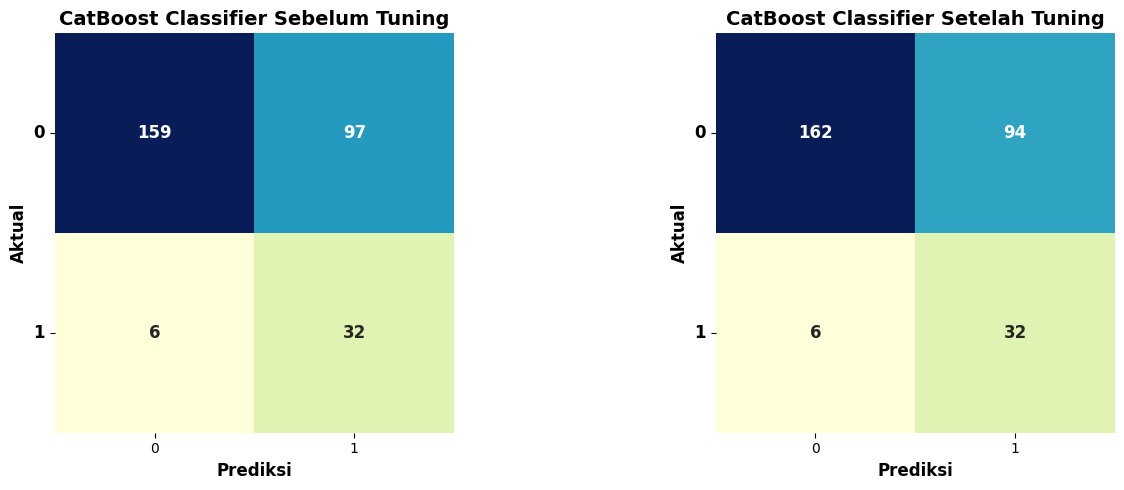

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='YlGnBu', square=True, 
            annot_kws={"size": 12, "weight": "bold"}, cbar=False)
plt.xlabel('Prediksi', fontsize=12, fontweight='bold')
plt.ylabel('Aktual', fontsize=12, fontweight='bold')
plt.title('CatBoost Classifier Sebelum Tuning', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold', rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_test_tune), annot=True, fmt='d', cmap='YlGnBu', square=True, 
            annot_kws={"size": 12, "weight": "bold"}, cbar=False)
plt.xlabel('Prediksi', fontsize=12, fontweight='bold')
plt.ylabel('Aktual', fontsize=12, fontweight='bold')
plt.title('CatBoost Classifier Setelah Tuning', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold', rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
# Melatih model LogReg pada seluruh dataset (X dan y)
logreg.fit(X, y)

# Menyimpan model Logreg yang telah dilatih ke dalam file dengan format .sav
file_name = 'employee_attrition_logreg.sav'
pickle.dump(logreg, open(file_name, 'wb'))

In [ ]:
coefs = logreg_tuning.best_estimator_.named_steps['model'].coef_[0]
features = logreg_tuning.best_estimator_.named_steps['preprocessing'].get_feature_names_out()
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs,
    'Importance (abs)': np.abs(coefs)
}).sort_values(by='Importance (abs)', ascending=False)

feature_importance.head()

,Feature,Coefficient,Importance (abs)
20,onehot__OverTime_Yes,2.705402,2.705402
14,onehot__JobRole_Research Director,-2.603663,2.603663
12,onehot__JobRole_Manager,-2.458415,2.458415
17,onehot__JobRole_Sales Representative,2.241679,2.241679
0,onehot__BusinessTravel_Travel_Frequently,2.016819,2.016819


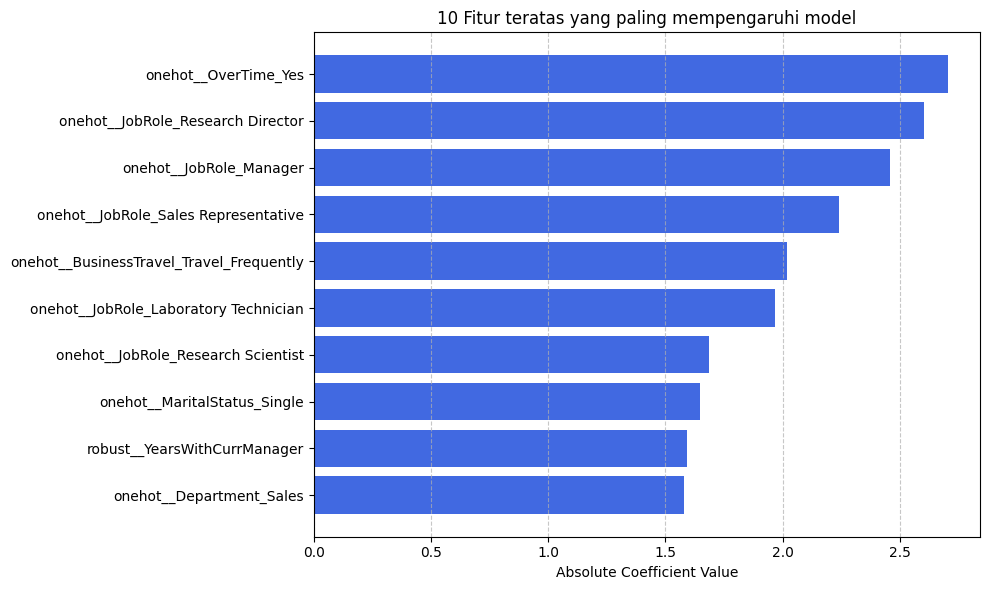

In [ ]:
# Mengambil 10 fitur teratas
top_n = 10
top_features = feature_importance.head(top_n)

# Plot horizontal barchart
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance (abs)'], color='royalblue')
plt.xlabel('Absolute Coefficient Value')
plt.title(f'{top_n} Fitur teratas yang paling mempengaruhi model')
plt.gca().invert_yaxis()  # agar yang paling penting di atas
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
X_train_transformed = logreg.named_steps['preprocessing'].fit_transform(X_train)
transformed_features = logreg.named_steps['preprocessing'].get_feature_names_out()
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_features)
X_train_resampled, y_train_resampled = logreg.named_steps['resample'].fit_resample(X_train_transformed_df, y_train)

In [ ]:
X_test_transformed = logreg.named_steps['preprocessing'].transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=transformed_features)

In [ ]:
logreg.named_steps['model'].fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=10, l1_ratio=0, max_iter=200, random_state=42,
                   solver='saga')

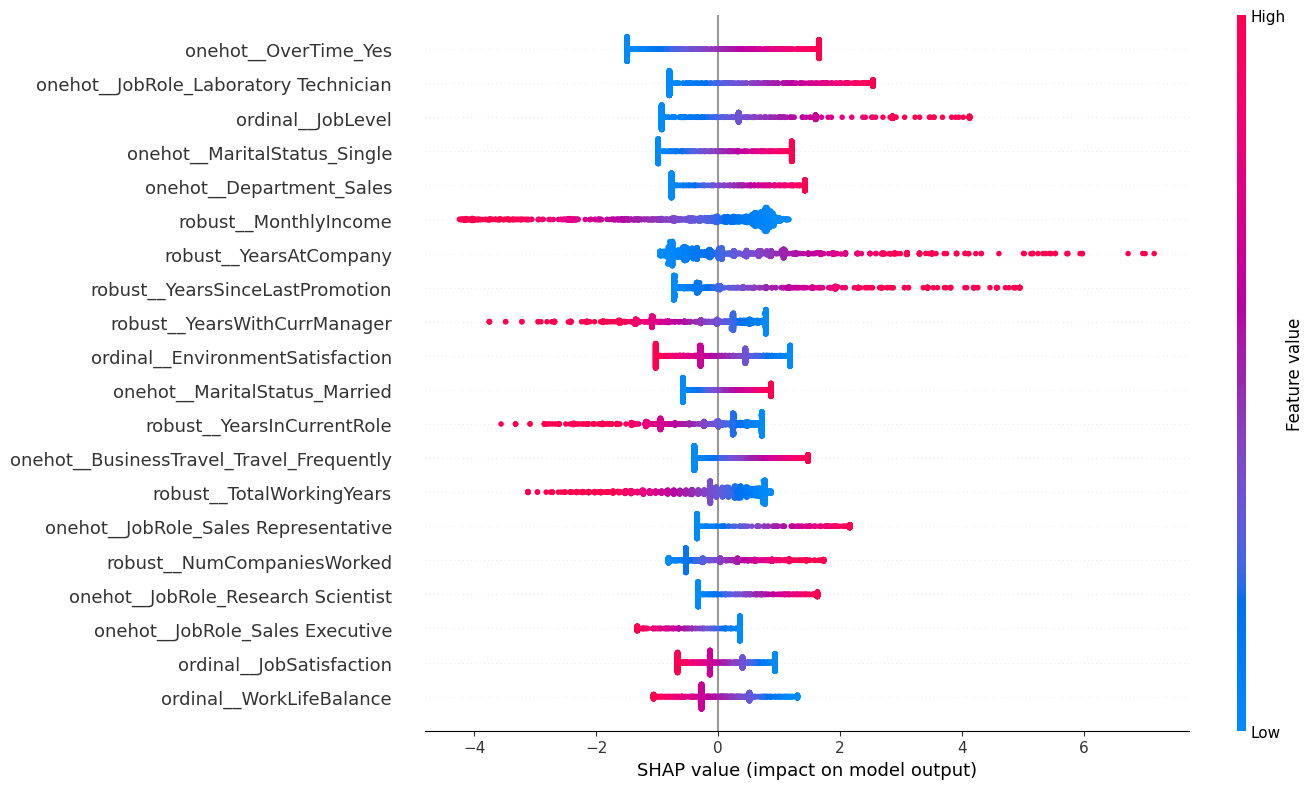

In [ ]:
explainer = shap.Explainer(logreg_tuning.best_estimator_.named_steps['model'], X_train_resampled)
shap_values = explainer(X_train_resampled)

# SHAP summary plot
shap.summary_plot(
    shap_values, 
    X_train_resampled, 
    feature_names=features,
    plot_size=(14, 8)
)